<a href="https://colab.research.google.com/github/khushalbisani/Urban-Sound-Classification-Btech-Project/blob/master/Melspec_feature_and_deep_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy
!pip install helpers
!pip install soundfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D ,GlobalAveragePooling2D,MaxPool2D
from keras.models import Sequential
import random
import librosa
import librosa.display
import os
import  IPython.display as ipd
from scipy.io import wavfile as wav
import helpers
import soundfile as sf
%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
os.chdir("/content/drive/My Drive/Noisy_Sound_Classification")


In [0]:
path = "/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/"
data = pd.read_csv(path + "metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
# import subprocess
# subprocess.Popen(['ffmpeg'],shell=True)

In [0]:
# for row in range(len(data)):
#   file_name = "/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/" + "audio/" + "fold" + str(data['fold'][row]) + "/" + str(data['slice_file_name'][row])
#   if data['end'][row]-data['start'][row] >= 3:
#     class_label = data["classID"][row]
#     fea = extract_feature_melspec(file_name)
#     if fea.shape != (128,128) : continue
#     mel_spec.append((fea,class_label))
#   print(row)

In [0]:
# mel_spec = []

# def extract_feature_melspec(file_name):
#   audio , sample_rate = librosa.load(file_name , duration = 2.97 , res_type = 'kaiser_fast')
#   ms = librosa.feature.melspectrogram(y = audio , sr = sample_rate)
#   return ms

In [0]:
# len(mel_spec)

In [0]:
# ms_data = mel_spec
# random.shuffle(ms_data)

# train = ms_data[:6500]
# test = ms_data[6500:]

# train_x , train_y = zip(*train)
# test_x , test_y = zip(*test)

# train_x = np.array([x.reshape((128,128,1)) for x in train_x]) 
# test_x = np.array([x.reshape((128,128,1)) for x in test_x])

# train_y = np.array(keras.utils.to_categorical(train_y, 10))
# test_y = np.array(keras.utils.to_categorical(test_y, 10))

In [0]:
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

In [0]:
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_x.npy', train_x)
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_y.npy', train_y)
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_x.npy', test_x)
# np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_y.npy', test_y) 

In [0]:
train_x = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_x.npy')
train_y = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_train_y.npy')
test_x = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_x.npy')
test_y = np.load('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/np_array_test_y.npy')

In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(6500, 128, 128, 1)
(6500, 10)
(967, 128, 128, 1)
(967, 10)


In [0]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

# model.add(Flatten())
# model.add(Dropout(rate=0.5))

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(rate=0.5))

model.add(GlobalAveragePooling2D())


model.add(Dense(10))
model.add(Activation('softmax'))



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 24)      624       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 62, 24)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 25, 48)        

In [0]:
from keras.optimizers import Adam,SGD
optimizer = SGD(lr=0.01, momentum=0.9,nesterov=True)

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

In [0]:

model.compile(
	optimizer=optimizer,
	loss="categorical_crossentropy",
	metrics=['accuracy'])

history = model.fit(
	x=train_x, 
	y=train_y,
  epochs=30,
  batch_size=64,
  callbacks = [learning_rate_reduction],
  validation_data= (test_x, test_y))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6500 samples, validate on 967 samples
Epoch 1/30
6500/6500 [==============================] - 10s 2ms/step - loss: 2.1531 - acc: 0.2745 - val_loss: 1.9658 - val_acc: 0.3640
Epoch 2/30
6500/6500 [==============================] - 2s 377us/step - loss: 1.8740 - acc: 0.3628 - val_loss: 1.7648 - val_acc: 0.3568
Epoch 3/30
6500/6500 [==============================] - 2s 380us/step - loss: 1.6123 - acc: 0.4391 - val_loss: 1.6303 - val_acc: 0.4891
Epoch 4/30
6500/6500 [==============================] - 2s 375us/step - loss: 1.5011 - acc: 0.4808 - val_loss: 1.5668 - val_acc: 0.4623
Epoch 5/30
6500/6500 [==============================] - 2s 379us/step - loss: 1.3448 - acc: 0.5426 - val_loss: 1.3870 - val_acc: 0.5832
Epoch 6/30
6500/6500 [==============================] - 2s 382us/step - loss: 1.3048 - acc: 0.5525 - val_loss: 1.3323 - val_acc: 0.5481
Epoch 7/30
6500/6500 [===================

In [0]:
score = model.evaluate(
	x=test_x,
	y=test_y)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

967/967 [==============================] - 0s 236us/step
Test loss: 0.9011219265295777
Test accuracy: 0.7156153050980376


In [0]:
score = model.evaluate(x = train_x , y = train_y)
print("Training Accuracy :",score[1])
print('Training Loss:', score[0])

score = model.evaluate(x = test_x , y = test_y)
print("Test Accuracy :",score[1])
print('Test Loss:', score[0])

6500/6500 [==============================] - 1s 202us/step
Training Accuracy : 0.7644615384615384
Training Loss: 0.7311899927212642
967/967 [==============================] - 0s 214us/step
Test Accuracy : 0.7156153050980376
Test Loss: 0.9011219265295777


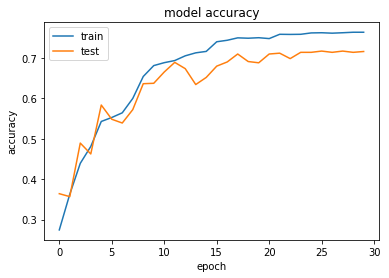

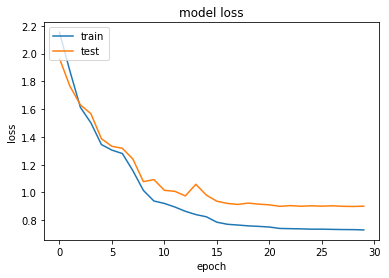

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:

pred = model.predict(test_x)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_y,axis = 1)

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

CM = confusion_matrix(y_true, pred)
print(CM)

[[ 99   0   3   0   5   4   0   8   1  17]
 [  1  15   2   0   3   0   0   2   2   2]
 [  4   0  75   8   1   0   0   1  12  12]
 [  6   0  25  51   1   0   0   0   5   0]
 [  4   1   2   1  98   1   0   7   4   6]
 [ 14   0   5   0   0  66   0  12   1   0]
 [  1   0   0   0   0   1   5   0   0   0]
 [ 13   0   1   0  11   7   0  84   0   0]
 [  5   2   8   0   2   2   0   0  96   4]
 [ 11   1  10   3   4   2   0   0   4 103]]


Text(33.0, 0.5, 'True label')

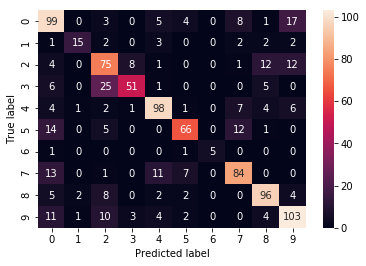

In [0]:
sns.heatmap(CM, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [0]:
sum=0
for i in range(10):
  for j in range(10):
    sum+=CM[i][j]
    if(i==j):
      x=CM[i][j]
  print(i," ",x/sum)
  sum=0
     
    

0   0.7226277372262774
1   0.5555555555555556
2   0.6637168141592921
3   0.5795454545454546
4   0.7903225806451613
5   0.673469387755102
6   0.7142857142857143
7   0.7241379310344828
8   0.8067226890756303
9   0.7463768115942029


In [0]:
np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/melspec_train_acc.npy', history.history['acc'])
np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/melspec_test_acc.npy', history.history['val_acc'])
np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/melspec_train_loss.npy', history.history['loss'])
np.save('/content/drive/My Drive/Noisy_Sound_Classification/UrbanSound8K/melspec_test_loss.npy', history.history['val_loss']) 